### Essential Libraries

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math
import sklearn.metrics as metrics
%matplotlib inline

### Initializing The Matrix

In [ ]:
matrix_a_normal = [[1,2,3],[4,5,6]]
matrix_b_normal = [[7,8,9], [10,11,12]]

matrix_a = np.array(matrix_a_normal)
matrix_b = np.array(matrix_b_normal)

matrix_a

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
matrix_b

array([[ 7,  8,  9],
       [10, 11, 12]])

### Matrix Operations

**Sum of 2 matrix**

In [ ]:
np_sum = matrix_a + matrix_b
np_sum

array([[ 8, 10, 12],
       [14, 16, 18]])

In [ ]:
sum_val = [[matrix_a_normal[i][j] + matrix_b_normal[i][j] for j in range(len(matrix_a_normal[i]))] for i in range(len(matrix_a_normal))] if len(matrix_a_normal)==len(matrix_b_normal) and len(matrix_a_normal[0])==len(matrix_b_normal[0]) else -1

In [ ]:
sum_val

[[8, 10, 12], [14, 16, 18]]

**Matrix Substraction**

In [ ]:
np_sub = matrix_a - matrix_b
np_sub

array([[-6, -6, -6],
       [-6, -6, -6]])

In [ ]:
sub = [[matrix_a_normal[i][j] - matrix_b_normal[i][j] for j in range(len(matrix_a_normal[i]))] for i in range(len(matrix_a_normal))] if len(matrix_a_normal)==len(matrix_b_normal) and len(matrix_a_normal[0])==len(matrix_b_normal[0]) else -1
sub

[[-6, -6, -6], [-6, -6, -6]]

**Matrix Multiplication**

Element-wise multiplication (Hadamard product)

In [ ]:
elementwise_product = matrix_a * matrix_b
elementwise_product

array([[ 7, 16, 27],
       [40, 55, 72]])

In [ ]:
mul = [[matrix_a_normal[i][j] * matrix_b_normal[i][j] for j in range(len(matrix_a_normal[i]))] for i in range(len(matrix_a_normal))] if len(matrix_a_normal)==len(matrix_b_normal) and len(matrix_a_normal[0])==len(matrix_b_normal[0]) else -1
mul

[[7, 16, 27], [40, 55, 72]]

**Dot product**

In [ ]:
matrix_b.T

array([[ 7, 10],
       [ 8, 11],
       [ 9, 12]])

In [ ]:
dot = np.dot(matrix_a, matrix_b.T)
dot

array([[ 50,  68],
       [122, 167]])

In [ ]:
m1 = [[1,2,3],[4,5,6]]
m2 = [[7,10],[8,11],[9,12]]

assert len(m1)==len(m2[0])

res = [[0] * len(m1)] * len(m2[0])
for i in range(len(m1)):
  for j in range(len(m2[0])):
   for k in range(len(m2)):
    res[i][j] += m1[i][k] * m2[k][j]

res

[[172, 235], [172, 235]]

**Matrix Transpose**

In [ ]:
matrix_a.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [ ]:
num_rows = len(matrix_a_normal)
num_cols = len(matrix_a_normal[0])
transposed = [[0 for _ in range(num_rows)] for _ in range(num_cols)]

for i in range(num_rows):
    for j in range(num_cols):
        transposed[j][i] = matrix_a_normal[i][j]

transposed

[[1, 4], [2, 5], [3, 6]]

**Matrix Determinant**

In [ ]:
matrix = np.array([[1,2,3],[4,8,6],[7,5,9]])
np.linalg.det(matrix)

-54.00000000000001

*from scratch -->*

In [ ]:
from copy import deepcopy

def new_matrix(a, i):
  if len(a) == 2:
    return a
  arr = deepcopy(a)
  arr.pop(0)
  for j in arr:
    j.pop(i)
  return arr

def determinant(A):
  n = len(A)
  if n==1:
    return A[0][0]
  elif n==2:
    return A[0][0]*A[1][1] - A[1][0]*A[0][1]
  else:
    res = 0
    for i in range(len(A[0])):
      res += ((-1)**i) * A[0][i] * determinant(new_matrix(A, i))
    return res

In [ ]:
m = [[1,2,3],[4,8,6],[7,5,9]]
determinant(m)

-54

**Matrix Inverse**

In [ ]:
matrix = np.array([[1,2,3],[4,8,6],[7,5,9]])
np.linalg.inv(matrix)

array([[-0.77777778,  0.05555556,  0.22222222],
       [-0.11111111,  0.22222222, -0.11111111],
       [ 0.66666667, -0.16666667,  0.        ]])

**Matrix Eigenvalues and Eigenvectors**

In [ ]:
matrix = np.array([
    [8, -8, -2],
    [4, -3, -2],
    [3, -4, 1]
])

eigenvalues, eigenvectors = np.linalg.eig(matrix)


In [ ]:
eigenvalues

array([1., 3., 2.])

In [ ]:
eigenvectors

array([[-0.74278135, -0.81649658, -0.80178373],
       [-0.55708601, -0.40824829, -0.53452248],
       [-0.37139068, -0.40824829, -0.26726124]])

### Matrix Tranformations

**Scaling**

In [ ]:
def scale_matrix(matrix, scalar):
  res = [[elem*scalar for elem in row] for row in matrix]
  return res

scale_matrix(matrix_a_normal, 5)

[[5, 10, 15], [20, 25, 30]]

**Rotate 90 degree** <br>
Find the transpose and reverse each row

In [ ]:
def rotate(matrix):
  transpose = [[matrix[j][i] for j in range(len(matrix))] for i in range(len(matrix[0]))]
  res = [row [::-1] for row in transpose]
  return res

rotate(matrix_a_normal)

[[4, 1], [5, 2], [6, 3]]

In [ ]:
matrix_a_normal

[[1, 2, 3], [4, 5, 6]]

**Shearing a matrix**

In [ ]:
m = [
    [1,2],
    [3,4]
]

def shear_matrix_x(matrix, shear_factor):
  res = [[row[0] + shear_factor * row [1]] for row in matrix]
  return res

shear_matrix_x(m, 2)

[[5], [11]]

In [ ]:
matrix_a_normal

[[1, 2, 3], [4, 5, 6]]

**Variablility**


In [ ]:
data = np.array([1,2,3,3,4,5,6])
mean = np.mean(data)
median = np.median(data)
mode = stats.mode(data)
variance = np.var(data)
std = np.std(data)

mean

3.4285714285714284

In [ ]:
median

3.0

In [ ]:
variance

2.5306122448979593

In [ ]:
mode[0]

3

In [ ]:
std

1.5907898179514348

*from scratch*

In [ ]:
def mean(data):
  return sum(data)/len(data)

def median(data):
  no = len(data)
  data.sort()
  if no%2==1:
    return data[no//2]
  else:
    return (data[no//2]+data[(no//2)-1])/2

def mode(data):
  c = {data.count:i for i in set(data)}
  return c[max(c)]

def variance(data):
  mean_data = mean(data)
  squared_diff = [(x-mean_data)**2 for x in data]
  return  sum(squared_diff) / len(data)

def std(data):
  return math.sqrt(variance(data))


In [ ]:
data = [1,2,3,3,4,5,6]
mean_val = mean(data)
median_val = median(data)
mode_val = mode(data)
variance_val = variance(data)
std_dev = std(data)

print(f'mean:{mean_val}, median:{median_val}, mode:{mode_val}, std:{std_dev}')

mean:3.4285714285714284, median:3, mode:6, std:1.5907898179514348


**Correlation**

In [ ]:
x = np.array([1,2,3,4,5])
y = np.array([2,4,5,4,5])

correlation = np.corrcoef(x,y)[0,1]

In [ ]:
correlation

0.7745966692414834

*from scratch*

In [ ]:
def corr(x,y):
  if len(x) != len(y) :
    raise ValueError("not same length")

  n = len(x)
  mean_x = mean(x)
  mean_y = mean(y)

  product_sum = sum((x[i] - mean_x)*(y[i] - mean_y) for i in range(n))

  x_squared_sum = sum((x[i]- mean_x)**2 for i in range(n))
  y_squared_sum = sum((y[i]- mean_y)**2 for i in range(n))

  correlation = product_sum / (math.sqrt(x_squared_sum) * math.sqrt(y_squared_sum))

  return correlation

In [ ]:
x = [10, 15, 20, 25, 30]
y = [5, 10, 15, 20, 22]

corr(x,y)

0.9908301680442989

**Covariance**

In [ ]:
x = np.array([1,2,3,4,5])
y = np.array([2,4,5,4,5])

cov = np.cov(x,y)[0,1]
cov

1.5

*from scratch*

In [ ]:
def cov(x,y, sample=True):
  if len(x) != len(y):
    raise ValueError("inputs are not same length")

  n = len(x)
  mean_x = mean(x)
  mean_y = mean(y)

  product_sum = sum((x[i] - mean_x) * (y[i] - mean_y) for i in range(n))

  if sample:
    return product_sum / (n-1)
  else:
    return product_sum / n

In [ ]:
x = [1,2,3,4,5]
y = [2,4,5,4,5]

cov(x, y)

1.5

### Hypothesis Testing

**T-test**

In [ ]:
# Sample data
data = np.array([72, 68, 75, 80, 78, 74, 70, 73, 76, 79])

# Population mean
population_mean = 70

t_stat, p_value = stats.ttest_ind(data, population_mean)

p_value

0.29917314270029594

In [ ]:
alpha = 0.05
if p_value < alpha:
    print(f"Reject the null hypothesis. Sample mean is significantly different from {population_mean}.")
else:
    print(f"Fail to reject the null hypothesis. Sample mean is not significantly different from {population_mean}.")


Fail to reject the null hypothesis. Sample mean is not significantly different from 70.


*from scratch*

In [ ]:
def mean(data):
  return sum(data) / len(data)

def variance(data, ddof=0):
  n = len(data)
  mu = mean(data)
  return sum((x - mu) ** 2 for x in data) / (n - ddof)

def standard_error(data1, data2):
  n1 = len(data1)
  n2 = len(data2)
  var1 = variance(data1)
  var2 = variance(data2)
  se = math.sqrt(var1 / n1 + var2 / n2)
  return se

def t_statistic(data1, data2):
  mean1 = mean(data1)
  mean2 = mean(data2)
  se = standard_error(data1, data2)
  return (mean1- mean2) / se

def degrees_of_freedom(data1, data2):
  n1 = len(data1)
  n2 = len(data2)
  dof = n1 + n2 -2
  return dof

def critical_t_value(alpha, dof):
  t_dist_table = {
      0.01: 2.626,
      0.05: 1.645,
      0.10: 1.282
  }

  if alpha in t_dist_table:
    return t_dist_table[alpha]
  else:
    raise ValueError("Unsupported alpha value")

def calculate_p_val(data1, data2, alpha=0.05):
  t_stat = t_statistic(data1, data2)
  dof = degrees_of_freedom(data1, data2)
  critic_t = critical_t_value(alpha, dof)

  if t_stat > 0:
    p_value = 2 * (1- stats.t.cdf(abs(t_stat), dof))
  else:
    p_value = 2 * stats.t.cdf(abs(t_stat), dof)

  return p_value

In [ ]:
data1 = [25, 30, 35, 40, 45]
data2 = [20, 28, 32, 38, 42]

# Calculate the p-value for the t-test
alpha = 0.05
calculate_p_val(data1, data2, alpha)


0.538866507801611

**Z-Test**

*used when you have a large sample size (typically n > 30) and want to compare a sample mean to a known population mean*

Example: Testing if the average height of a sample of people is significantly different from the average height of the entire population


In [ ]:
data = np.array([72, 68, 75, 80, 78, 74, 70, 73, 76, 79])

population_mean = 70
population_std_dev = 5

z_score, p_value = sm.stats.ztest(data, value=population_mean, alternative='two-sided')

p_value

0.0002581955800354797

**Chi-square Test**

In [ ]:
# Contingency table
observed = np.array([[30, 20], [15, 25]])

# Perform chi-square test
chi2_stat, p_value, _, _ = stats.chi2_contingency(observed)

p_value

0.056237803877275776

**f-test (ANNOVA)**

In [ ]:
group1 = np.array([10, 12, 15, 17, 20])
group2 = np.array([8, 11, 13, 16, 18])

_, p_value = stats.f_oneway(group1, group2)

p_value

0.5410105897949291

**IQR (Inter Quartile Range)**

In [ ]:
data = np.array([1,2,3,4,5])
data_range = np.max(data) - np.min(data)

Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
iqr = Q3 - Q1

In [ ]:
data_range

4

In [ ]:
iqr

2.0

**Skewness**

Text(0.5, 1.0, 'Skewness: 0.03')

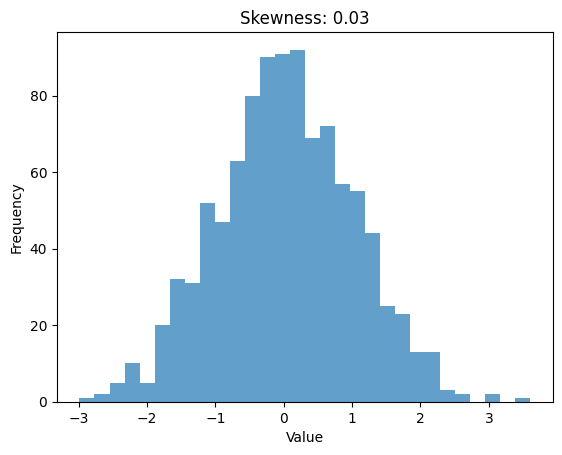

In [ ]:
data = np.random.normal(0, 1, 1000)

skewness = stats.skew(data)
skewness

plt.hist(data, bins=30, density=False, alpha=0.7,)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(f'Skewness: {skewness:.2f}')

*from scratch*

In [ ]:
def skewness(data):
  n = len(data)
  mu = mean(data)
  sigma = std(data)
  skew = sum((x - mu) ** 3 for x in data) * n / ((n-1) * (n-2) * sigma ** 3)
  return skew

data = [10, 15, 20, 25, 30, 34]
skewness(data)

-0.11834529950845592

**Kurtosis**

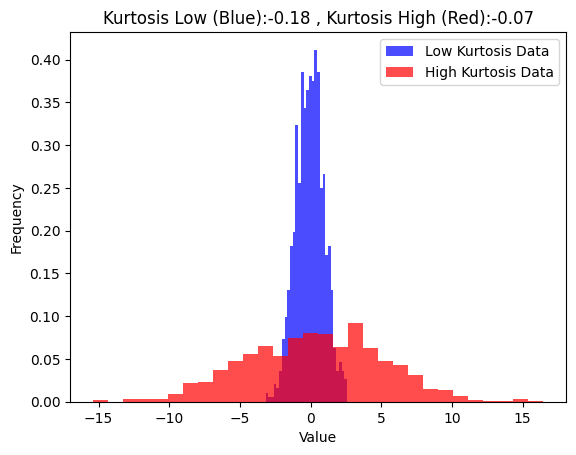

In [ ]:
data_low_kurtosis = np.random.normal(0, 1, 1000)
data_high_kurtosis = np.random.normal(0, 1, 1000) + 5 * np.random.normal(0, 1, 1000)

kurtosis_low = stats.kurtosis(data_low_kurtosis)
kurtosis_high = stats.kurtosis(data_high_kurtosis)


plt.hist(data_low_kurtosis, bins=30, density=True, alpha=0.7, color='blue', label='Low Kurtosis Data')
plt.xlabel('Value')
plt.ylabel('Frequency')


plt.hist(data_high_kurtosis, bins=30, density=True, alpha=0.7, color='red', label='High Kurtosis Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.title(f'Kurtosis Low (Blue):{kurtosis_low:.2f} , Kurtosis High (Red):{kurtosis_high:.2f}')

plt.legend()
plt.show()

**Z-score**

In [ ]:
data = np.array([10,12,20,25,30])

mean = np.mean(data)
std_dev = np.std(data)

data_point = 22

zscore = (data_point - mean)/ std_dev
zscore

0.3430568790800189

**Standardization (z-score scaling)**

In [ ]:
data = np.array([10,20,35,40,50])

mean = np.mean(data)
std_dev = np.std(data)

standardized_data = (data - mean) / std_dev
standardized_data

array([-1.47029409, -0.77015405,  0.28005602,  0.63012604,  1.33026608])

In [ ]:
np.mean(standardized_data)

0.0

In [ ]:
np.std(standardized_data)

1.0

**Min Max Normalization**

In [ ]:
data = np.array([10,20,35,40,50])

min_value = np.min(data)
max_value = np.max(data)

normalized_data = (data - min_value)/ (max_value - min_value)
normalized_data

array([0.   , 0.25 , 0.625, 0.75 , 1.   ])

In [ ]:
np.max(normalized_data)

1.0

In [ ]:
np.min(normalized_data)

0.0

### Various Distributions

**Normal Distribution**

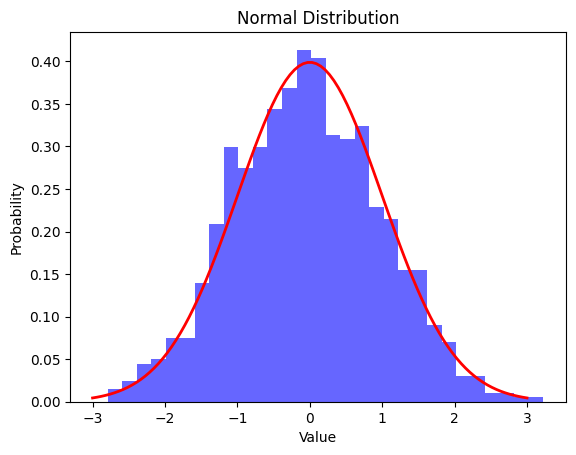

In [ ]:
mean = 0
std_dev = 1

data = np.random.normal(mean, std_dev, 1000)

plt.hist(data, bins=30, density=True, alpha=0.6, color='b')

x = np.linspace(-3, 3, 100)
pdf = stats.norm.pdf(x, mean, std_dev)
plt.plot(x, pdf, 'r-', lw=2)

plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.show()

**Binomial Distribution**

<ipython-input-63-acb389b879ce>:10: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(x, pmf, 'r-', basefmt=" ", use_line_collection=True)


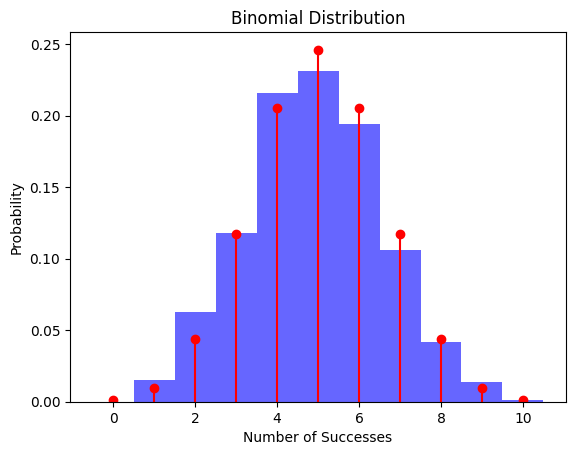

In [ ]:
n = 10
p = 0.5

data = np.random.binomial(n, p, 1000)

plt.hist(data, bins=np.arange(0, n+2) - 0.5, density=True, alpha=0.6, color='b')

x = np.arange(0, n+1)
pmf = stats.binom.pmf(x,n,p)
plt.stem(x, pmf, 'r-', basefmt=" ", use_line_collection=True)

plt.title('Binomial Distribution')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.show()

In [ ]:
np.median(data)

5.0

**Poisson Distribution**

<ipython-input-65-981635e3e1e4>:9: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(x, pmf, 'r-', basefmt=" ", use_line_collection=True)


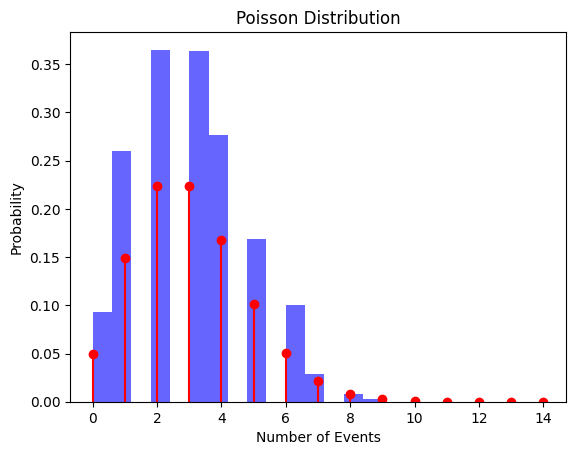

In [ ]:
lambda_ = 3

data = np.random.poisson(lambda_, 1000)

plt.hist(data, bins=15, density=True, alpha=0.6, color='b')

x = np.arange(0, 15)
pmf = stats.poisson.pmf(x, lambda_)
plt.stem(x, pmf, 'r-', basefmt=" ", use_line_collection=True)

plt.title('Poisson Distribution')
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.show()

**Box plot**

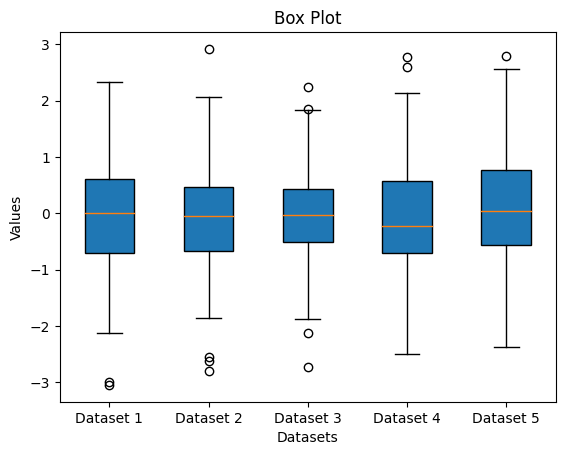

In [ ]:
data = [np.random.normal(0, 1, 100) for _ in range(5)]  # Creating 5 sets of random data

plt.boxplot(data, vert=True, patch_artist=True)

plt.xticks([1, 2, 3, 4, 5], ['Dataset 1', 'Dataset 2', 'Dataset 3', 'Dataset 4', 'Dataset 5'])
plt.xlabel('Datasets')
plt.ylabel('Values')
plt.title('Box Plot')

plt.show()

**Regression**

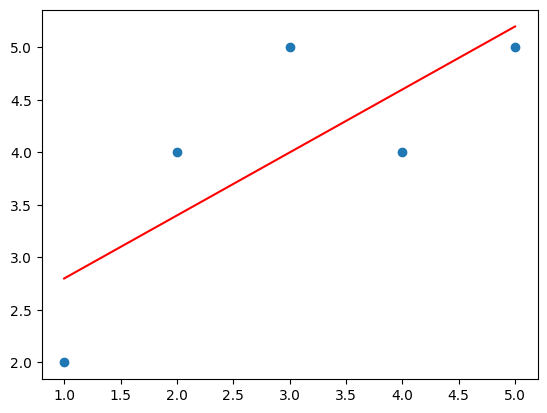

In [ ]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)

plt.scatter(x, y)
plt.plot(x, polynomial(x), color='r')
plt.show()

In [ ]:
coefficients

array([0.6, 2.2])

In [ ]:
polynomial

poly1d([0.6, 2.2])

**Linear Regression**

In [ ]:

class LinearRegression:
  def __init__(self, learning_rate=0.01, num_iterations=1000):
    self.learning_rate = learning_rate
    self.num_iterations = num_iterations
    self.weights = None
    self.bias = None

  def fit(self, X, y):
    num_samples, num_features = X.shape
    self.weights = np.zeros(num_features)
    self.bias = 0

    # Gradient descent
    for i in range(self.num_iterations):

      linear_model = np.dot(X, self.weights) + self.bias

      gradient_weights = (1/ num_samples) * np.dot(X.T, (linear_model - y))
      gradient_bias = (1/num_samples) * np.sum(linear_model - y)

      self.weights -= self.learning_rate * gradient_weights
      self.bias -= self.learning_rate * gradient_bias

  def predict(self, X):
    return np.dot(X, self.weights) + self.bias


In [ ]:
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 2, 5, 4, 5])

model = LinearRegression(learning_rate=0.05, num_iterations=1000)
model.fit(X, y)

In [ ]:
X_test = np.array([[6], [7]])
model.predict(X_test)[matrix_a_normal[i][j] * matrix_b_normal[i][j] for j in range(len(matrix_a_normal[i]))] for i in range(len(matrix_a_normal))]

array([6.7706422 , 7.90091743])

In [ ]:
model.weights, model.bias

(array([1.13027523]), -0.011009174311926629)

**Bayes' theorem**

In [ ]:
P_A = 0.2
P_B = 0.3

P_B_given_A = 0.6 # Probability of event B given event A
P_B_given_not_A = 0.4  # Probability of event B given not event A

P_A_given_B = (P_B_given_A * P_A)/ P_B
P_A_given_B

0.4

**Central Limit Theorem**

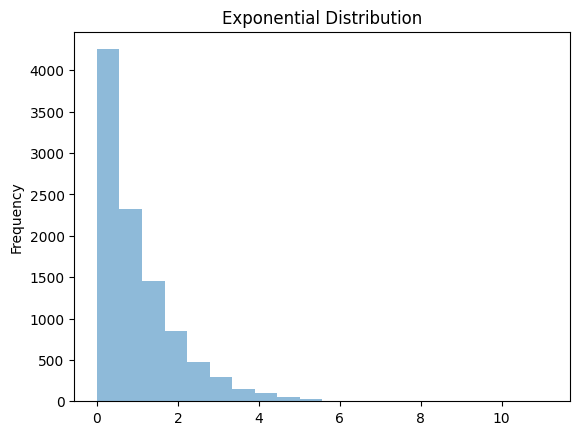

In [ ]:
population_mean = 3
population_std_dev = 1
population_size = 10000

num_samples = 1000

sample_sizes = [10, 30, 50]

sample_means = []

# Create the population data (e.g., exponential distribution)
population_data = np.random.exponential(scale=population_std_dev, size=population_size)

plt.hist(population_data, bins=20, alpha=0.5)
plt.title('Exponential Distribution')
plt.ylabel('Frequency')

plt.show()

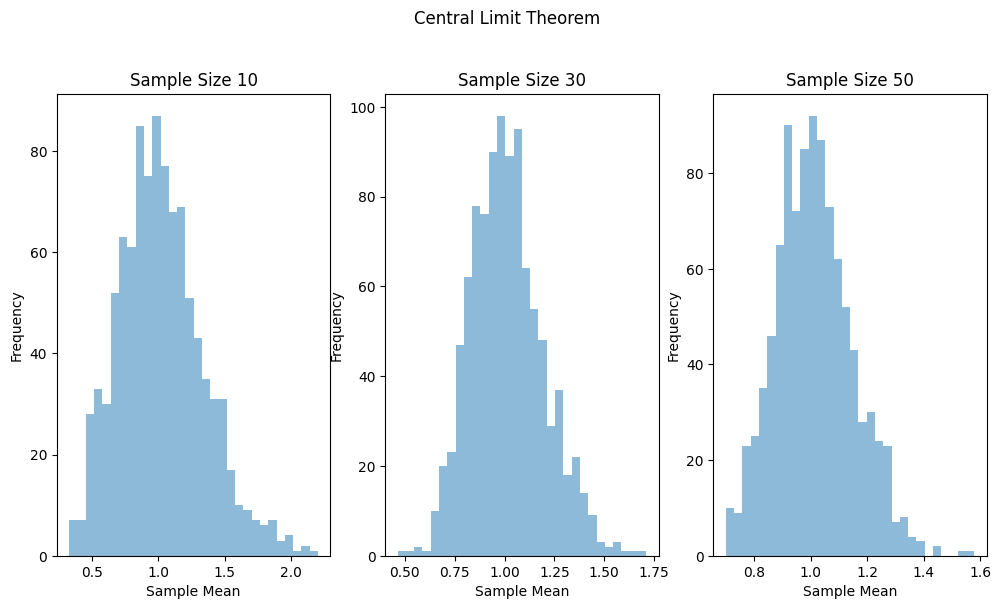

In [ ]:
for sample_size in sample_sizes:
    means = []
    for _ in range(num_samples):
        sample = np.random.choice(population_data, size=sample_size)
        sample_mean = np.mean(sample)
        means.append(sample_mean)
    sample_means.append(means)

# Plot the sampling distributions
plt.figure(figsize=(12, 6))
for i, sample_size in enumerate(sample_sizes):
    plt.subplot(1, len(sample_sizes), i + 1)
    plt.hist(sample_means[i], bins=30, alpha=0.5)
    plt.title(f'Sample Size {sample_size}')
    plt.xlabel('Sample Mean')
    plt.ylabel('Frequency')


plt.suptitle('Central Limit Theorem', y=1.02)
plt.show()


(array([4.254e+03, 2.324e+03, 1.451e+03, 8.470e+02, 4.790e+02, 2.920e+02,
        1.500e+02, 9.700e+01, 5.000e+01, 2.700e+01, 9.000e+00, 8.000e+00,
        4.000e+00, 4.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([4.62564896e-06, 5.57045218e-01, 1.11408581e+00, 1.67112640e+00,
        2.22816699e+00, 2.78520759e+00, 3.34224818e+00, 3.89928877e+00,
        4.45632936e+00, 5.01336995e+00, 5.57041055e+00, 6.12745114e+00,
        6.68449173e+00, 7.24153232e+00, 7.79857291e+00, 8.35561351e+00,
        8.91265410e+00, 9.46969469e+00, 1.00267353e+01, 1.05837759e+01,
        1.11408165e+01]),
 <BarContainer object of 20 artists>)

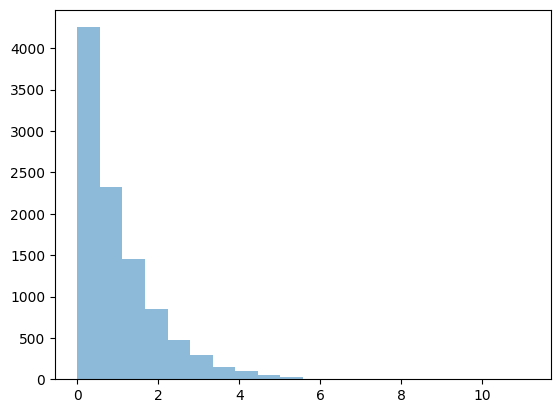

In [ ]:
plt.hist(population_data, bins=20, alpha=0.5)

### Accuracy metrics for Regression

*MAE, MSE, RMSE, R2*

In [ ]:
y_true = [3.0, 2.5, 4.0, 5.1, 2.8]
y_pred = [2.8, 2.7, 4.2, 4.9, 3.0]

mae = metrics.mean_absolute_error(y_true, y_pred)
mse = metrics.mean_squared_error(y_true, y_pred)
rmse = metrics.mean_squared_error(y_true, y_pred, squared=False)
r2 = metrics.r2_score(y_true, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared (R2):", r2)

MAE: 0.2
MSE: 0.039999999999999994
RMSE: 0.19999999999999998
R-squared (R2): 0.9560246262093228


*scratch --->*

In [ ]:
def mean_absolute_error(y_true, y_pred):
  s = sum(abs(yt - yp) for yt, yp in zip(y_true, y_pred))
  return s / len(y_true)

def mean_squared_error(y_true, y_pred, squared=True):
  s = sum((yt - yp)**2 for yt, yp in zip(y_true, y_pred))
  res = s / len(y_true)

  return res if squared else res ** 0.5

def r2_score(y_true, y_pred):
  mean_y_true = sum(y_true)/ len(y_true)
  ss_total = sum((yt - mean_y_true) ** 2 for yt in y_true)
  ss_resid = sum((yt - yp) ** 2 for yt, yp in zip(y_true, y_pred))

  return 1 - (ss_resid / ss_total)

In [ ]:
y_true = [3.0, 2.5, 4.0, 5.1, 2.8]
y_pred = [2.8, 2.7, 4.2, 4.9, 3.0]

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
r2 = r2_score(y_true, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared (R2):", r2)

MAE: 0.2
MSE: 0.039999999999999994
RMSE: 0.19999999999999998
R-squared (R2): 0.9560246262093228


### Accuracy metrics for classification

*Accuracy, precision, recall, f1, roc_auc, confusion matrix*

In [ ]:
y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]
y_pred = [1, 0, 1, 0, 1, 1, 0, 1, 1, 0]

accuracy = metrics.accuracy_score(y_true, y_pred)
precision = metrics.precision_score(y_true, y_pred)
recall = metrics.recall_score(y_true, y_pred)
f1 = metrics.f1_score(y_true, y_pred)
roc_auc = metrics.roc_auc_score(y_true, y_pred)
conf_matrix = metrics.confusion_matrix(y_true, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC-AUC:", roc_auc)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7
Precision: 0.6666666666666666
Recall: 0.8
F1-Score: 0.7272727272727272
ROC-AUC: 0.7000000000000001
Confusion Matrix:
[[3 2]
 [1 4]]


*scratch -->*

In [ ]:
def accuracy(y_true, y_pred):
  s = sum(1 for yt, yp in zip(y_true, y_pred) if yt == yp)
  res = s / len(y_true)
  return res


def precision(y_true, y_pred):
  true_positive = sum(1 for yt, yp in zip(y_true, y_pred) if yt==1 and yp==1)
  false_positive = sum(1 for yt, yp in zip(y_true, y_pred) if yt==0 and yp==1)

  return true_positive / (true_positive + false_positive)


def recall(y_true, y_pred):
  true_positives = sum(1 for yt, yp in zip(y_true, y_pred) if yt == 1 and yp == 1)
  false_negatives = sum(1 for yt, yp in zip(y_true, y_pred) if yt == 1 and yp == 0)

  return true_positives / (true_positives + false_negatives)


def f1_score(y_true, y_pred):
  data_precision = precision(y_true, y_pred)
  data_recall = recall(y_true, y_pred)

  return (data_precision * data_recall) / (data_precision + data_recall)


def confusion_matrix(y_true, y_pred):
  true_positive = sum(1 for yt, yp in zip(y_true, y_pred) if yt == 1 and yp == 1)
  false_positive = sum(1 for yt, yp in zip(y_true, y_pred) if yt == 0 and yp == 1)
  true_negative = sum(1 for yt, yp in zip(y_true, y_pred) if yt == 0 and yp == 0)
  false_negative = sum(1 for yt, yp in zip(y_true, y_pred) if yt == 1 and yp == 0)

  return [[true_negative, false_positive], [false_negative ,true_positive]]

In [ ]:
y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]
y_pred = [1, 0, 1, 0, 1, 1, 0, 1, 1, 0]

accuracy = metrics.accuracy_score(y_true, y_pred)
precision = metrics.precision_score(y_true, y_pred)
recall = metrics.recall_score(y_true, y_pred)
f1 = metrics.f1_score(y_true, y_pred)
conf_matrix = metrics.confusion_matrix(y_true, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7
Precision: 0.6666666666666666
Recall: 0.8
F1-Score: 0.7272727272727272
Confusion Matrix:
[[3 2]
 [1 4]]
